# Imports

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1

        tv    radio  social_media influencer     sales
0  16000.0  6566.23       2907.98       Mega  54732.76
1  13000.0  9237.76       2409.57       Mega  46677.90
Feature with highest correlation (from visual inspection): tv
First five predictions: [ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


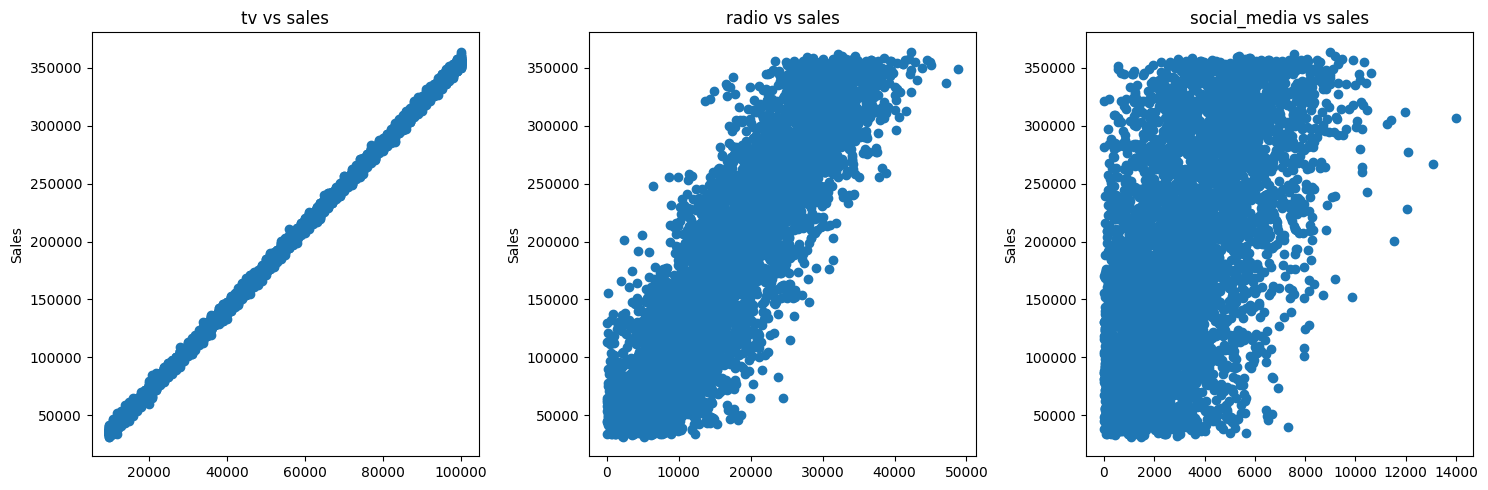

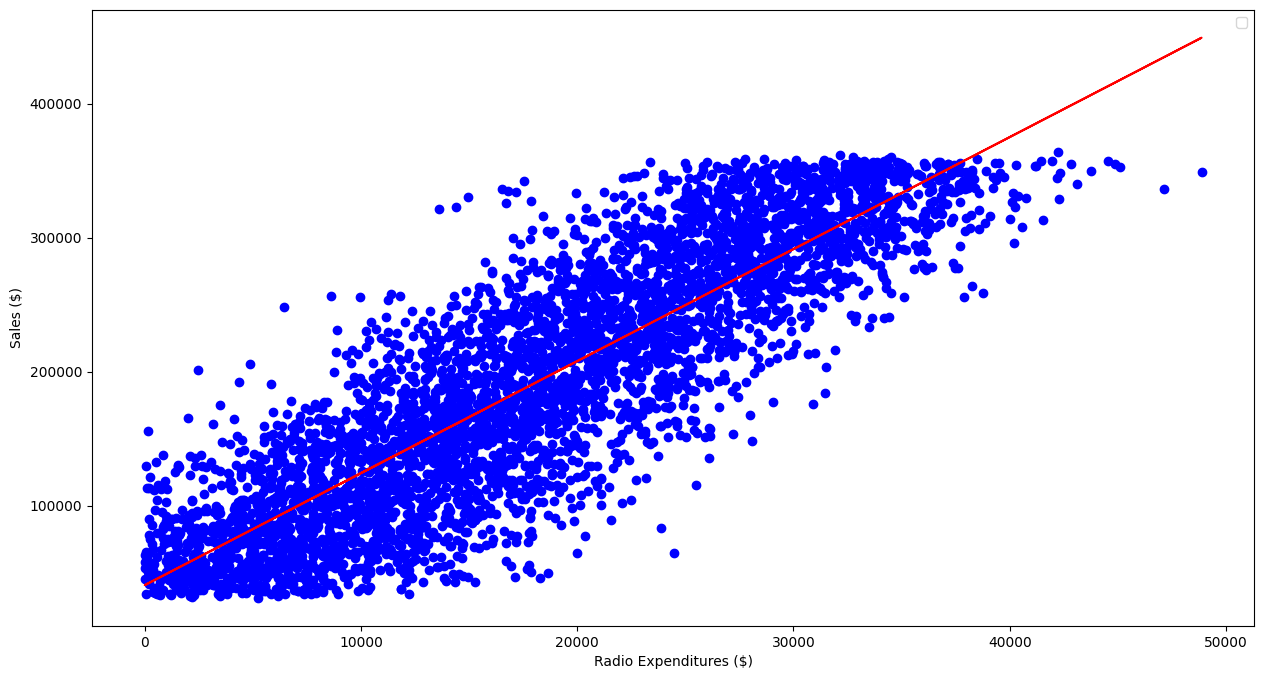

In [ ]:
data_path = '/content/drive/My Drive/ML_24-25/Data/advertising_and_sales_clean.csv'
data = pd.read_csv(data_path)

print(data.head(2))

X_radio = data[["radio"]]
y = data["sales"]
reg = LinearRegression()
reg.fit(X_radio, y)

predictions = reg.predict(X_radio)
print("Feature with highest correlation (from visual inspection): tv")
print("First five predictions:", predictions[:5])


features = ["tv", "radio", "social_media"]
_ , axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data["sales"])
    axes[i].set_title(f"{feature} vs sales")
    axes[i].set_ylabel("Sales")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
plt.scatter(X_radio, y, color="blue")
plt.plot(X_radio, predictions, color="red")
plt.ylabel("Sales ($)")
plt.xlabel("Radio Expenditures ($)")
plt.legend()
plt.show()

# Task 2

In [2]:
data_path = '/content/drive/My Drive/ML_24-25/Data/advertising_and_sales_clean.csv'
data = pd.read_csv(data_path)

features = ["tv", "radio", "social_media"]
target = "sales"

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Predictions:", predictions[:2])
print("Actual Values:", y_test.iloc[:2].values)

# for fun
def my_RMSE(test, predictions):
  errors = ( test - predictions )
  MSE = np.mean(errors ** 2)
  result = np.sqrt(MSE)
  return result

r2 = model.score(X_test, y_test)
rmse = root_mean_squared_error(y_test, predictions)
my_rmse = my_RMSE(y_test, predictions)

print()
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")
print(f"My RMSE: {my_rmse}")

Predictions: [53176.66154234 70996.19873235]
Actual Values: [55261.28 67574.9 ]

R^2: 0.9990152104759368
RMSE: 2944.4331996001
My RMSE: 2944.4331996001


# Task 3

In [9]:
#Какво е проблемът с използването на R^2?
# Основният проблем с R^2 е, че той винаги се увеличава, когато добавяме нови променливи към модела, дори ако те не подобряват точността на прогнозите.
# Това може да доведе до прекомерно напасване (overfitting), когато моделът става твърде сложен.

# Как R_adj^2 решава този проблем?
# Adjusted R^2 включва наказание за добавянето на нови променливи към модела.
# То взема на предвид броя на независимите променливи и размера на данните, което помага да се избегне напасването.
# Ако нова променлива не допринася значително за предвиждането в модела, R_adj^2 може да намалее.

# Как можем да изчислим R_adj^2 в Python?
# R_adj^2 = 1 - [(1 - R^2) * (n - 1) / (n - k - 1)]

# - n е броят на наблюденията
# - k е броят на независимите променливи.


# Не намерих вградена функция
k = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f"R^2: {r2}")
print(f"Adjusted R^2: {adjusted_r2}")


#Източници:
#https://www.youtube.com/watch?v=IN6YkHtdgZI&ab_channel=SuperDataScience
#https://towardsdatascience.com/r-squared-vs-adjusted-r-squared-simplified-543993e69558
#https://stats.stackexchange.com/questions/425622/does-over-fitting-a-model-affect-r-squared-only-or-adjusted-r-squared-too


R^2: 0.9990152104759368
Adjusted R^2: 0.9990130381461043
